In [37]:
import subprocess

command = "pip3 install pandas numpy causality"
print(subprocess.check_output(['bash','-c',command]).decode('utf-8'))

In [46]:
import numpy as np
import pandas as pd
from causality.analysis.dataframe import CausalDataFrame
%matplotlib inline

Let's confound $X$ and $Y$ with a couple of $Z$ variables, $z_1$ and $z_2$

In [39]:
N = 1000
lower = -1
upper = 1
z1 = np.random.uniform(lower, upper, size=N)
z2 = np.random.uniform(lower, upper, size=N)
x  = np.random.uniform(lower, upper, size=N) + (z1 + z2)/2.
z  = z1 + z2
y  = np.random.normal(size=N) - x + 2.* z
X  = CausalDataFrame({'x': x, 'y': y, 'z1': z1, 'z2': z2})



The causal effect of $X$ on $Y$ is given by cutting the edge from $Z_1$ and $Z_2$ into $X$. Taking the expectation of the $Y$ formula, using that $Z$ and $X$ are now independent, we see the conditional expecation is now $y(x) = E[Y|X=x] = E[U - X + 2Z|X=x] = 0 - E[X|X=x] + 2 E[Z|X=x] = - x + 2 E[Z] = - x$, where $U \sim \mathcal{N}(0,1)$. The naive plot looks nothing like $y = -x$:


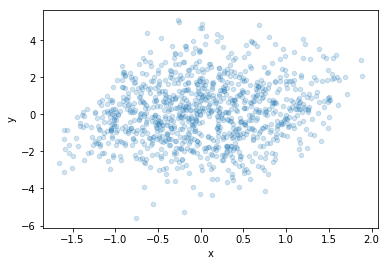

In [40]:
X.plot(x='x', y='y', style='bo', alpha=0.2, kind='scatter');

but let's check the plot after back-door adjustment for $Z_1$ and $Z_2$ ...

In [41]:
X.zplot(x='x', y='y', z=['z1', 'z2'], z_types={'z1': 'c', 'z2': 'c'}, kind='line', model_type='kernel')

KeyboardInterrupt: 

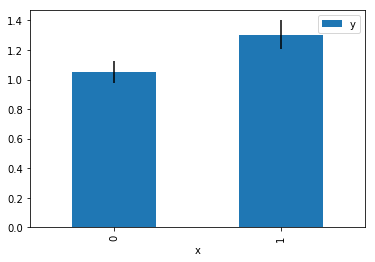

In [48]:
N = 1000

z = np.random.normal(1., size=N)
x = np.random.binomial(1, p=1./(1. + np.exp(z/.1)))
y = x + z + np.random.normal(size=N)

df = CausalDataFrame({'x': x, 'y': y, 'z': z})

df.zplot(x='x', y='y', z=['z'], kind='mean', bootstrap_samples=1000)